# Logistic Regression via Gradient Descent

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

from data import read_logistic_data_sets
from nn import Logistic
from tools import train

def experiment(class_1, class_2, initial_rate, T,
               epoch_min, epoch_max, early_stopping):
    
    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    dss = read_logistic_data_sets(class_1, class_2)
    print('Training set size:', dss.train.size)
    print('Hold-out set size:', dss.validation.size)
    print('Test set size:', dss.test.size)
    results = train(Logistic, dss, rate=rate,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
    
    label = '{}{}'.format(class_1, class_2)
    
    results.plot_loss_function()
    plt.savefig('figs/logistic_{}_E.pdf'.format(label))
    plt.ylim(0, 3)
    plt.savefig('figs/logistic_{}_E_zoom.pdf'.format(label))
    plt.plot()
    
    results.plot_percent_correct()
    plt.savefig('figs/logistic_{}_c.pdf'.format(label))
    plt.ylim(0.9, 1)
    plt.savefig('figs/logistic_{}_c_zoom.pdf'.format(label))
    plt.plot()

### 2 vs 3

Training set size: 3582
Hold-out set size: 423
Test set size: 426


/Users/qobilidop/miniconda3/envs/cse253/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


CPU times: user 3min 7s, sys: 38.7 s, total: 3min 45s
Wall time: 1min 56s


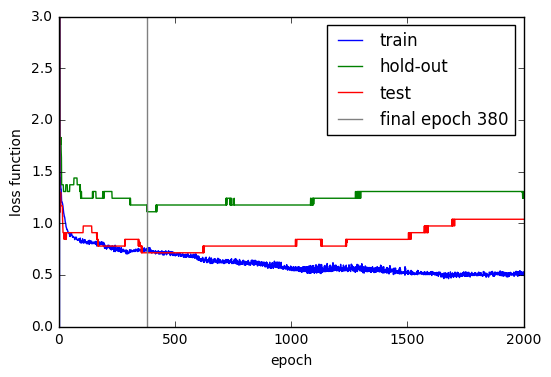

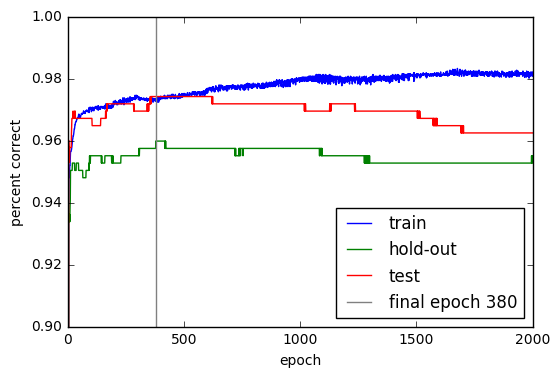

In [45]:
%%time
experiment(2, 3, rate_0=1e-3, T=42,
           epoch_min=500, epoch_max=2000, early_stopping=3)

### 2 vs 8

Training set size: 3472
Hold-out set size: 379
Test set size: 411


/Users/qobilidop/miniconda3/envs/cse253/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


CPU times: user 3min 2s, sys: 37.9 s, total: 3min 40s
Wall time: 1min 55s


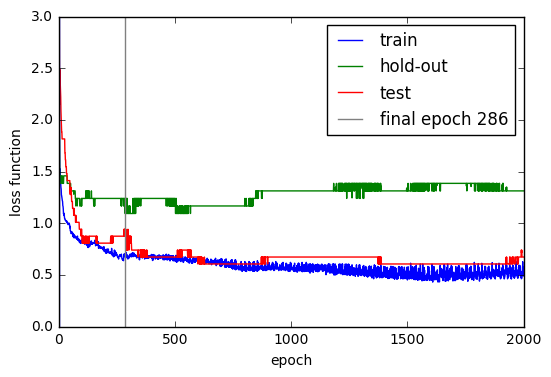

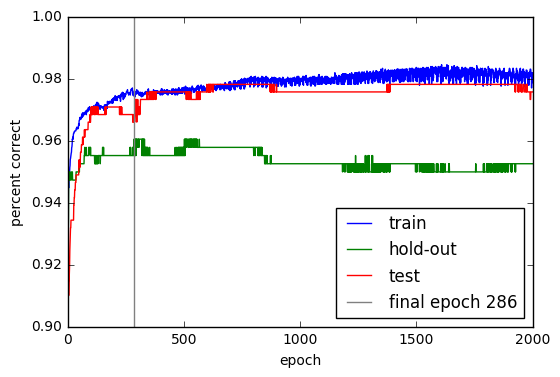

In [44]:
%%time
experiment(2, 8, rate_0=1e-3, T=42,
           epoch_min=500, epoch_max=2000, early_stopping=3)